In [3]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
import numpy as np

%load_ext autoreload
%autoreload 2 
# auto relad py files 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df=pd.read_csv(r'C:\Project 2026\LSMS Project\LCMS\data\combined\inputs_none_all_batches_ZEROS.csv\inputs_none_all_batches_ZEROS.csv')
df.head(5)

,ID,label,batch,359.0_0_1000,359.0_0_1020,359.0_0_1030,359.0_0_1050,359.0_0_1060,359.0_0_1080,359.0_0_1090,...,872.0_320_900,872.0_320_910,872.0_320_920,872.0_320_930,872.0_320_940,872.0_320_950,872.0_320_960,872.0_320_970,872.0_320_980,872.0_320_990
0,sma_b3-02-29-2024_240216_u103_l,sma,b3,246.445786,114.216324,489.135040,110.375916,438.210785,254.849380,565.677795,...,24.282871,11.091238,0.0,8.841338,8.747418,0.0,12.089150,20.171013,0.0,0.000000
1,pmi_b3-02-29-2024_230802_u111_l,pmi,b3,63.599636,71.337250,100.067116,128.706146,222.839294,219.990097,299.839966,...,11.007890,98.616997,0.0,0.000000,76.318497,0.0,0.000000,0.000000,0.0,8.780501
2,efa_b3-02-29-2024_231108_u119_l,efa,b3,8.806048,89.737335,76.067886,136.388306,242.039276,198.487335,558.264099,...,35.956249,94.177505,0.0,48.191074,34.931290,0.0,80.466232,70.913620,0.0,19.069780
3,cal_b3-02-29-2024_240221_u068_h,cal,b3,107.049583,78.271996,265.537567,53.900013,386.654602,379.996033,356.673615,...,89.170670,114.145264,0.0,49.268127,172.875870,0.0,19.878231,46.694412,0.0,28.261786
4,sma_b3-02-29-2024_240216_u123_h,sma,b3,81.199501,222.661133,124.987297,123.657585,272.232452,326.412201,436.393158,...,22.956703,57.551453,0.0,0.000000,36.712730,0.0,19.171818,63.670605,0.0,0.000000


In [5]:
x=df.iloc[:,3:]
y=df.iloc[:,1]
print(x.columns)
print(y)

Index(['359.0_0_1000', '359.0_0_1020', '359.0_0_1030', '359.0_0_1050',
       '359.0_0_1060', '359.0_0_1080', '359.0_0_1090', '359.0_0_1110',
       '359.0_0_1120', '359.0_0_1140',
       ...
       '872.0_320_900', '872.0_320_910', '872.0_320_920', '872.0_320_930',
       '872.0_320_940', '872.0_320_950', '872.0_320_960', '872.0_320_970',
       '872.0_320_980', '872.0_320_990'],
      dtype='object', length=6725)
0       sma
1       pmi
2       efa
3       cal
4       sma
       ... 
1507    cfr
1508    ecl
1509    efc
1510    sau
1511    cfr
Name: label, Length: 1512, dtype: object


In [6]:
le=LabelEncoder()
y_enc=le.fit_transform(y)
print(np.unique(y_enc))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_enc,test_size=0.2,shuffle=True)
print(x_test.columns)
print(y_test)
print(x_test.shape)
print(y_test.shape)

Index(['359.0_0_1000', '359.0_0_1020', '359.0_0_1030', '359.0_0_1050',
       '359.0_0_1060', '359.0_0_1080', '359.0_0_1090', '359.0_0_1110',
       '359.0_0_1120', '359.0_0_1140',
       ...
       '872.0_320_900', '872.0_320_910', '872.0_320_920', '872.0_320_930',
       '872.0_320_940', '872.0_320_950', '872.0_320_960', '872.0_320_970',
       '872.0_320_980', '872.0_320_990'],
      dtype='object', length=6725)
[ 4  2 12 15  9 26 22 25 20 10  0 20 15  1  0  2  7  8  7 11  3 25 11 26
  0  9  9 12  7  2 18  1 19  1 19  6 22 23  3 16 16 11  2 18  3 10 18 20
  0  5  5  4  7 17 17  9  7  4  9 20  3  3 15 25  8  0 15  1 25 16 22 10
 24  4 24  9  0 19  0  3  5 22  8  0  8 15 14  9 24 10 13  3 26 16 16  2
 12 25 25 14 20  3  1  3  5  4 26 26 20  8 26 26 25  3 15  3 21 18  5 24
  7 13  5  3 13  6  5  5 10  6 22  9 22  3 25  0 24  1 21  5 13  4 26 24
 24 13  7  3 24  5  3 19  4  0 20 22  1 15  1 10 19 20  8  1  7 24 26  8
  3  0  1  5  3  1 24  1  2  0  2  0 16  0  8  8  6  3  6 24  3  2  8 

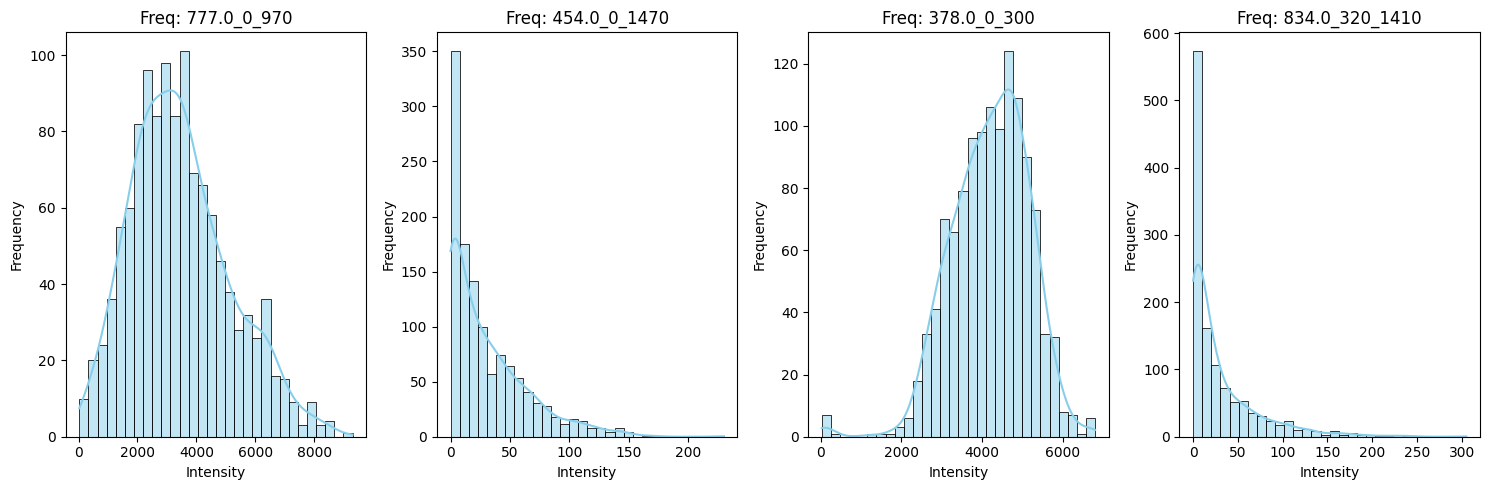

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Select 4 random features (columns) to visualize
random.seed(42)
feature_indices = random.sample(range(x_train.shape[1]), 4)
feature_names = x_train.columns[feature_indices]

plt.figure(figsize=(15, 5))
for i, col_idx in enumerate(feature_indices):
    plt.subplot(1, 4, i+1)
    # filtering 0 for better visualization of non-zero distribution if highly sparse
    data_to_plot = x_train.iloc[:, col_idx]
    sns.histplot(data_to_plot, bins=30, kde=True, color='skyblue')
    plt.title(f"Freq: {x_train.columns[col_idx]}")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [8]:
scaled=StandardScaler()
x_train_scaled=scaled.fit_transform(x_train)
x_test_scaled=scaled.transform(x_test)
print(x_train_scaled[:5,:5])
print(x_test_scaled[:5,:5])

[[-0.2598477  -0.76182868 -0.0742682  -0.37123977  0.67674682]
 [-1.08475723  4.03714947 -1.15941579  1.02551251 -1.34144324]
 [-0.21960344  0.09291119  0.32087395 -0.35724445  1.47083741]
 [-0.42688631 -0.56797344  0.41063571 -0.14060919 -0.54785184]
 [ 0.04921048  1.07597972 -0.37289794  2.23587927  0.43370523]]
[[ 1.56481545 -0.78169605  1.50254033  0.772813    1.98806838]
 [-0.38752973 -1.18283539 -0.03663928 -1.17627471 -0.28214807]
 [-1.14633732 -1.18283539 -0.89296357 -1.15705094 -0.58585766]
 [-0.14518615 -1.18283539  0.53597755 -1.15248632 -0.08071156]
 [ 0.09008497  2.26899619  0.85867546  2.40910089  1.61986227]]


In [9]:
# check for both NVIDIA or Mac Book
import torch
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
elif torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
else:
    DEVICE = torch.device("cpu")

print("Using:", DEVICE)

Using: cuda


In [10]:
import importlib
import custom_models_helper
importlib.reload(custom_models_helper)

# Now re-import the functions
from custom_models_helper import train_autoencoder, train_denoising_autoencoder, train_variational_autoencoder,train_classifier ,visualize_latent_space

In [11]:
# 1. Train Standard Autoencoder
ae_model, ae_history = train_autoencoder(
    x_train_scaled,
    x_test_scaled,
    DEVICE=DEVICE,
    verbose=True
)

[AE] Epoch 005 | Train MSE: 0.68163 | Val MSE: 0.58001
[AE] Epoch 010 | Train MSE: 0.62226 | Val MSE: 0.54948
[AE] Epoch 015 | Train MSE: 0.58865 | Val MSE: 0.52941
[AE] Epoch 020 | Train MSE: 0.56580 | Val MSE: 0.51416
[AE] Epoch 025 | Train MSE: 0.54936 | Val MSE: 0.50667
[AE] Epoch 030 | Train MSE: 0.53977 | Val MSE: 0.49687
[AE] Epoch 035 | Train MSE: 0.52663 | Val MSE: 0.49183
[AE] Epoch 040 | Train MSE: 0.51576 | Val MSE: 0.48412
[AE] Epoch 045 | Train MSE: 0.51117 | Val MSE: 0.47830
[AE] Epoch 050 | Train MSE: 0.49177 | Val MSE: 0.46963
[AE] Epoch 055 | Train MSE: 0.48976 | Val MSE: 0.46124
[AE] Epoch 060 | Train MSE: 0.47803 | Val MSE: 0.45312
[AE] Epoch 065 | Train MSE: 0.46946 | Val MSE: 0.44872
[AE] Epoch 070 | Train MSE: 0.46289 | Val MSE: 0.44314
[AE] Epoch 075 | Train MSE: 0.45602 | Val MSE: 0.44112
[AE] Epoch 080 | Train MSE: 0.45545 | Val MSE: 0.43563
[AE] Epoch 085 | Train MSE: 0.44546 | Val MSE: 0.43287
[AE] Epoch 090 | Train MSE: 0.45130 | Val MSE: 0.42992
[AE] Epoch

In [12]:
# 2. Train Denoising Autoencoder
# Make sure your helper file actually has a function named 'train_denoising_autoencoder'
# If you only have 'train_autoencoder' in the helper, use that for both but change parameters/classes as needed.
dae_model, dae_history = train_denoising_autoencoder(
    x_train_scaled,
    x_test_scaled,
    DEVICE=DEVICE,
    verbose=True
)

[DAE] Epoch 005 | Train MSE: 0.67365 | Val MSE: 0.57848
[DAE] Epoch 010 | Train MSE: 0.61960 | Val MSE: 0.55121
[DAE] Epoch 015 | Train MSE: 0.59139 | Val MSE: 0.53353
[DAE] Epoch 020 | Train MSE: 0.57511 | Val MSE: 0.51979
[DAE] Epoch 025 | Train MSE: 0.55573 | Val MSE: 0.50587
[DAE] Epoch 030 | Train MSE: 0.53572 | Val MSE: 0.50063
[DAE] Epoch 035 | Train MSE: 0.53328 | Val MSE: 0.49260
[DAE] Epoch 040 | Train MSE: 0.51527 | Val MSE: 0.48847
[DAE] Epoch 045 | Train MSE: 0.50979 | Val MSE: 0.48591
[DAE] Epoch 050 | Train MSE: 0.50064 | Val MSE: 0.47442
[DAE] Epoch 055 | Train MSE: 0.49505 | Val MSE: 0.46528
[DAE] Epoch 060 | Train MSE: 0.47956 | Val MSE: 0.45271
[DAE] Epoch 065 | Train MSE: 0.47955 | Val MSE: 0.44872
[DAE] Epoch 070 | Train MSE: 0.46720 | Val MSE: 0.44437
[DAE] Epoch 075 | Train MSE: 0.46305 | Val MSE: 0.44046
[DAE] Epoch 080 | Train MSE: 0.45453 | Val MSE: 0.43699
[DAE] Epoch 085 | Train MSE: 0.45596 | Val MSE: 0.43596
[DAE] Epoch 090 | Train MSE: 0.44612 | Val MSE: 

In [13]:
# 2. Train Denoising Autoencoder
# Make sure your helper file actually has a function named 'train_denoising_autoencoder'
# If you only have 'train_autoencoder' in the helper, use that for both but change parameters/classes as needed.
vae_model, vae_history = train_variational_autoencoder(
    x_train_scaled,
    x_test_scaled,
    DEVICE=DEVICE,
    verbose=True
)

[VAE] Epoch 005 | Loss: 0.71923 (MSE: 0.71775 KLD: 1.48033) | Val: 0.59220
[VAE] Epoch 010 | Loss: 0.64414 (MSE: 0.64213 KLD: 2.00648) | Val: 0.56782
[VAE] Epoch 015 | Loss: 0.61316 (MSE: 0.61088 KLD: 2.27860) | Val: 0.55826
[VAE] Epoch 020 | Loss: 0.59607 (MSE: 0.59375 KLD: 2.32298) | Val: 0.55106
[VAE] Epoch 025 | Loss: 0.57659 (MSE: 0.57433 KLD: 2.25975) | Val: 0.53637
[VAE] Epoch 030 | Loss: 0.56094 (MSE: 0.55864 KLD: 2.30189) | Val: 0.52272
[VAE] Epoch 035 | Loss: 0.54473 (MSE: 0.54241 KLD: 2.31715) | Val: 0.51170
[VAE] Epoch 040 | Loss: 0.53410 (MSE: 0.53177 KLD: 2.32753) | Val: 0.50082
[VAE] Epoch 045 | Loss: 0.52113 (MSE: 0.51878 KLD: 2.34108) | Val: 0.49514
[VAE] Epoch 050 | Loss: 0.51868 (MSE: 0.51635 KLD: 2.32668) | Val: 0.49121
[VAE] Epoch 055 | Loss: 0.50915 (MSE: 0.50683 KLD: 2.31641) | Val: 0.48738
[VAE] Epoch 060 | Loss: 0.50233 (MSE: 0.50004 KLD: 2.29085) | Val: 0.48312
[VAE] Epoch 065 | Loss: 0.49892 (MSE: 0.49663 KLD: 2.28127) | Val: 0.47989
[VAE] Epoch 070 | Loss: 0

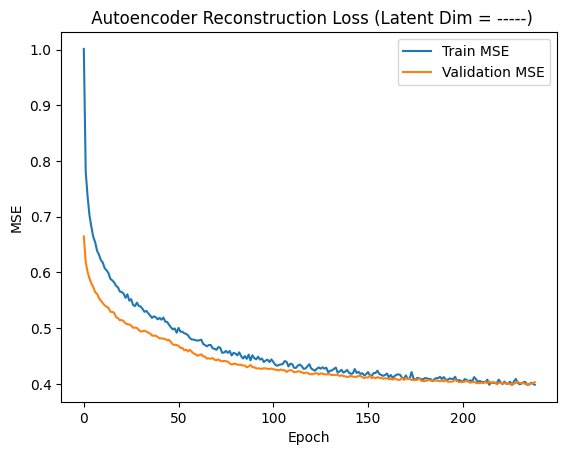

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ae_history["train_loss"], label="Train MSE")
plt.plot(ae_history["val_loss"], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title(" Autoencoder Reconstruction Loss (Latent Dim = -----)")
plt.legend()
plt.show()


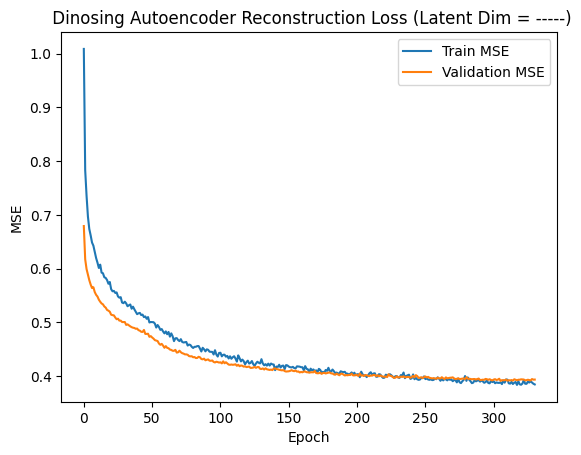

In [15]:

plt.figure()
plt.plot(dae_history["train_loss"], label="Train MSE")
plt.plot(dae_history["val_loss"], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title(" Dinosing Autoencoder Reconstruction Loss (Latent Dim = -----)")
plt.legend()
plt.show()

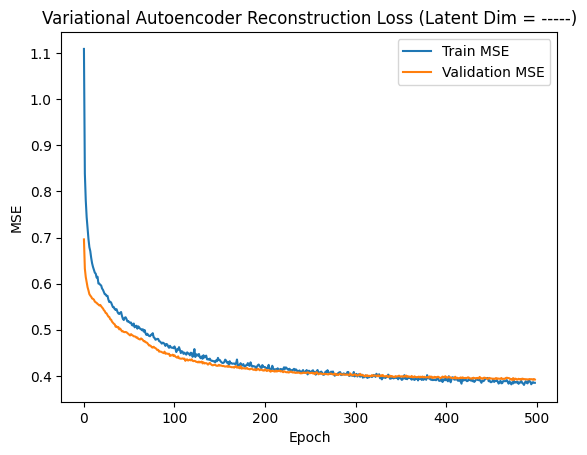

In [16]:


plt.figure()
plt.plot(vae_history["train_loss"], label="Train MSE")
plt.plot(vae_history["val_loss"], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Variational Autoencoder Reconstruction Loss (Latent Dim = -----)")
plt.legend()
plt.show()


In [17]:
def dim_model_selected(num):
    z_train = []
    z_test = []
    
    # Select the model
    if num == 1:
        model = ae_model
    elif num == 2:
        model = dae_model
    elif num == 3:
        model = vae_model
        
    model.eval()
    with torch.no_grad():
        # Move inputs to device
        inputs_train = torch.tensor(x_train_scaled, dtype=torch.float32).to(DEVICE)
        inputs_test = torch.tensor(x_test_scaled, dtype=torch.float32).to(DEVICE)
        
        # --- LOGIC FOR VAE ---
        if num == 3: 
            # 1. Pass through shared encoder layers
            enc_train = model.encoder(inputs_train)
            enc_test = model.encoder(inputs_test)
            
            # 2. Get the Mean (mu) - Best for classification stability
            z_train = model.fc_mu(enc_train).cpu().numpy()
            z_test = model.fc_mu(enc_test).cpu().numpy()
            
        # --- LOGIC FOR AE / DAE ---
        else:
            # Standard encoder call
            z_train = model.encoder(inputs_train).cpu().numpy()
            z_test = model.encoder(inputs_test).cpu().numpy()

    return z_train, z_test

In [18]:
# 4. Train Classifiers (FIXED VARIABLE NAMES)

# Extract features for AE
ae_features = dim_model_selected(1) # Returns (z_train, z_test)

print("Training Classifier on AE Latent Space...")
clf_model_ae, clf_history_ae = train_classifier(
    ae_features[0], y_train,   # z_train
    ae_features[1], y_test,    # z_test
    n_classes=len(np.unique(y_train)),
    DEVICE=DEVICE,
    verbose=True
)

Training Classifier on AE Latent Space...
[CLF] Epoch 005 | Loss: 3.3406 | Acc: 0.0759 | Macro-F1: 0.0362
[CLF] Epoch 010 | Loss: 3.2358 | Acc: 0.0792 | Macro-F1: 0.0364
[CLF] Epoch 015 | Loss: 3.1925 | Acc: 0.1023 | Macro-F1: 0.0338
[CLF] Epoch 020 | Loss: 3.1608 | Acc: 0.1518 | Macro-F1: 0.0771
[CLF] Epoch 025 | Loss: 3.0854 | Acc: 0.1782 | Macro-F1: 0.0994
[CLF] Epoch 030 | Loss: 3.0162 | Acc: 0.1551 | Macro-F1: 0.0725
[CLF] Epoch 035 | Loss: 2.9978 | Acc: 0.1485 | Macro-F1: 0.0622
[CLF] Epoch 040 | Loss: 2.9293 | Acc: 0.1584 | Macro-F1: 0.0763
[CLF] Epoch 045 | Loss: 2.9270 | Acc: 0.1683 | Macro-F1: 0.0848
[CLF] Epoch 050 | Loss: 2.8858 | Acc: 0.1650 | Macro-F1: 0.0795
[CLF] Epoch 055 | Loss: 2.8477 | Acc: 0.1518 | Macro-F1: 0.0762
[CLF] Epoch 060 | Loss: 2.8464 | Acc: 0.1584 | Macro-F1: 0.0772
[CLF] Epoch 065 | Loss: 2.8132 | Acc: 0.1650 | Macro-F1: 0.0860
[CLF] Epoch 070 | Loss: 2.7820 | Acc: 0.1551 | Macro-F1: 0.0766
[CLF] Epoch 075 | Loss: 2.7389 | Acc: 0.1617 | Macro-F1: 0.083

In [19]:
# Extract features for DAE
dae_features = dim_model_selected(2) # Returns (z_train, z_test)

print("Training Classifier on DAE Latent Space...")
clf_model_dae, clf_history_dae = train_classifier(
    dae_features[0], y_train,  # z_train
    dae_features[1], y_test,   # z_test
    n_classes=len(np.unique(y_train)),
    DEVICE=DEVICE,
    verbose=True
)

Training Classifier on DAE Latent Space...
[CLF] Epoch 005 | Loss: 3.3365 | Acc: 0.1089 | Macro-F1: 0.0329
[CLF] Epoch 010 | Loss: 3.2519 | Acc: 0.1188 | Macro-F1: 0.0297
[CLF] Epoch 015 | Loss: 3.1768 | Acc: 0.1452 | Macro-F1: 0.0439
[CLF] Epoch 020 | Loss: 3.1373 | Acc: 0.1518 | Macro-F1: 0.0436
[CLF] Epoch 025 | Loss: 3.1221 | Acc: 0.1551 | Macro-F1: 0.0417
[CLF] Epoch 030 | Loss: 3.0564 | Acc: 0.1650 | Macro-F1: 0.0473
[CLF] Epoch 035 | Loss: 3.0147 | Acc: 0.1617 | Macro-F1: 0.0485
[CLF] Epoch 040 | Loss: 2.9868 | Acc: 0.1617 | Macro-F1: 0.0472
[CLF] Epoch 045 | Loss: 2.9556 | Acc: 0.1650 | Macro-F1: 0.0552
[CLF] Epoch 050 | Loss: 2.9071 | Acc: 0.1782 | Macro-F1: 0.0673
[CLF] Epoch 055 | Loss: 2.8857 | Acc: 0.1749 | Macro-F1: 0.0672
[CLF] Epoch 060 | Loss: 2.8617 | Acc: 0.1716 | Macro-F1: 0.0651
[CLF] Epoch 065 | Loss: 2.8389 | Acc: 0.1749 | Macro-F1: 0.0732
[CLF] Epoch 070 | Loss: 2.8220 | Acc: 0.1782 | Macro-F1: 0.0793
[CLF] Epoch 075 | Loss: 2.7666 | Acc: 0.1815 | Macro-F1: 0.08

In [20]:


# Extract features for VAE
vae_features = dim_model_selected(3) # Returns (z_train, z_test)

print("Training Classifier on AE Latent Space...")
clf_model_vae, clf_history_vae = train_classifier(
    vae_features[0], y_train,   # z_train
    vae_features[1], y_test,    # z_test
    n_classes=len(np.unique(y_train)),
    DEVICE=DEVICE,
    verbose=True
)

Training Classifier on AE Latent Space...
[CLF] Epoch 005 | Loss: 3.3729 | Acc: 0.0594 | Macro-F1: 0.0170
[CLF] Epoch 010 | Loss: 3.2492 | Acc: 0.0792 | Macro-F1: 0.0301
[CLF] Epoch 015 | Loss: 3.2096 | Acc: 0.1188 | Macro-F1: 0.0505
[CLF] Epoch 020 | Loss: 3.1107 | Acc: 0.1386 | Macro-F1: 0.0579
[CLF] Epoch 025 | Loss: 3.0456 | Acc: 0.1452 | Macro-F1: 0.0606
[CLF] Epoch 030 | Loss: 2.9902 | Acc: 0.1419 | Macro-F1: 0.0611
[CLF] Epoch 035 | Loss: 2.9570 | Acc: 0.1485 | Macro-F1: 0.0660
[CLF] Epoch 040 | Loss: 2.9581 | Acc: 0.1650 | Macro-F1: 0.0734
[CLF] Epoch 045 | Loss: 2.9134 | Acc: 0.1584 | Macro-F1: 0.0706
[CLF] Epoch 050 | Loss: 2.8637 | Acc: 0.1716 | Macro-F1: 0.0832
[CLF] Epoch 055 | Loss: 2.8307 | Acc: 0.1749 | Macro-F1: 0.0886
[CLF] Epoch 060 | Loss: 2.8142 | Acc: 0.1782 | Macro-F1: 0.0956
[CLF] Epoch 065 | Loss: 2.7782 | Acc: 0.1749 | Macro-F1: 0.0942
[CLF] Epoch 070 | Loss: 2.7720 | Acc: 0.1749 | Macro-F1: 0.0979
[CLF] Epoch 075 | Loss: 2.7396 | Acc: 0.1782 | Macro-F1: 0.099

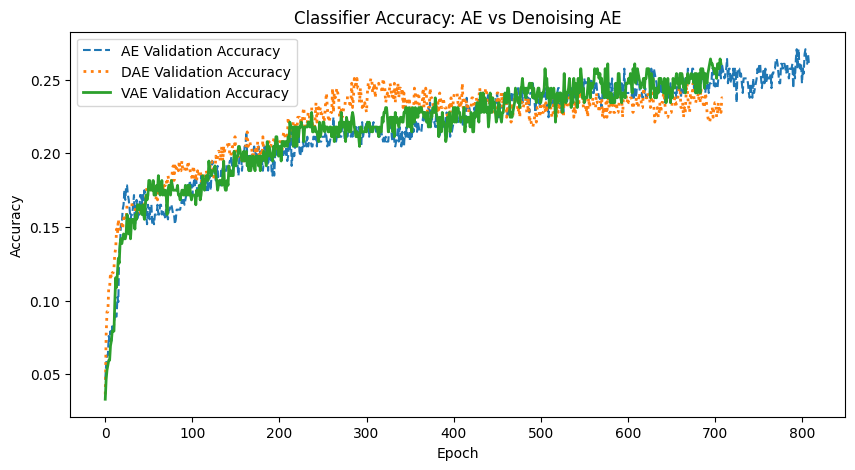

In [21]:
# Compare Performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(clf_history_ae["val_accuracy"], label="AE Validation Accuracy", linestyle="--")
plt.plot(clf_history_dae["val_accuracy"], label="DAE Validation Accuracy", linewidth=2,linestyle="dotted")
plt.plot(clf_history_vae["val_accuracy"], label="VAE Validation Accuracy", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy: AE vs Denoising AE")
plt.legend()
plt.show()

Visualizing Standard AE Latent Space...
Extracting latent features...
Running t-SNE on 303 samples with 64 dimensions...


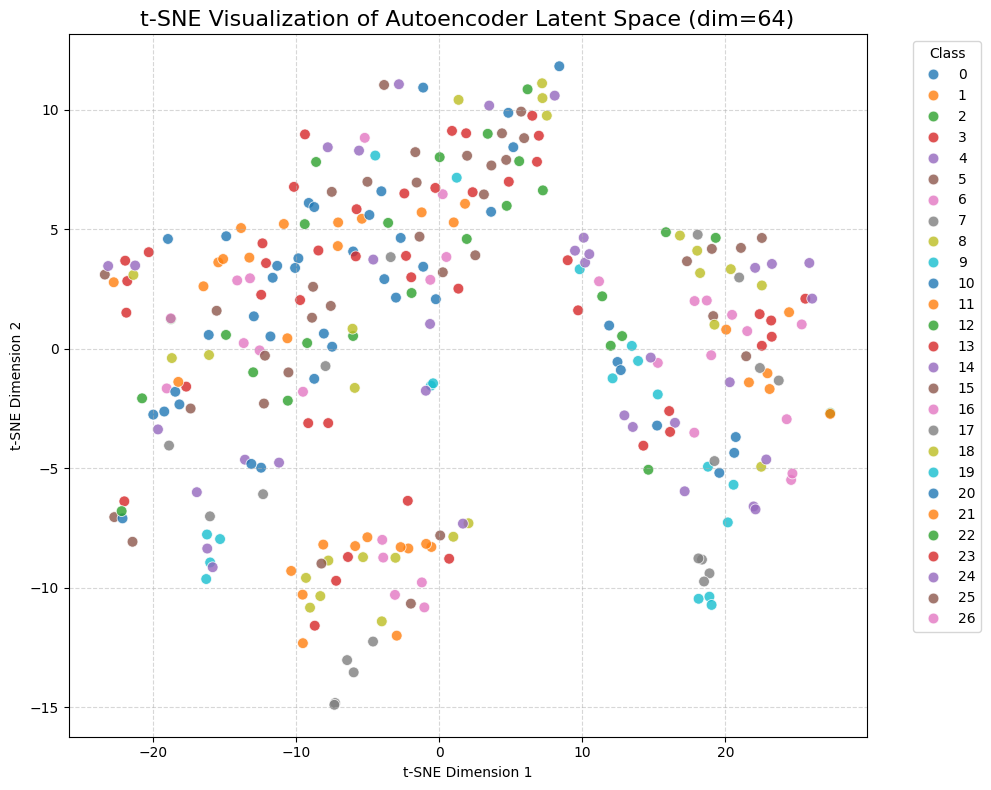

Visualizing Denoising DAE Latent Space...
Extracting latent features...
Running t-SNE on 303 samples with 64 dimensions...


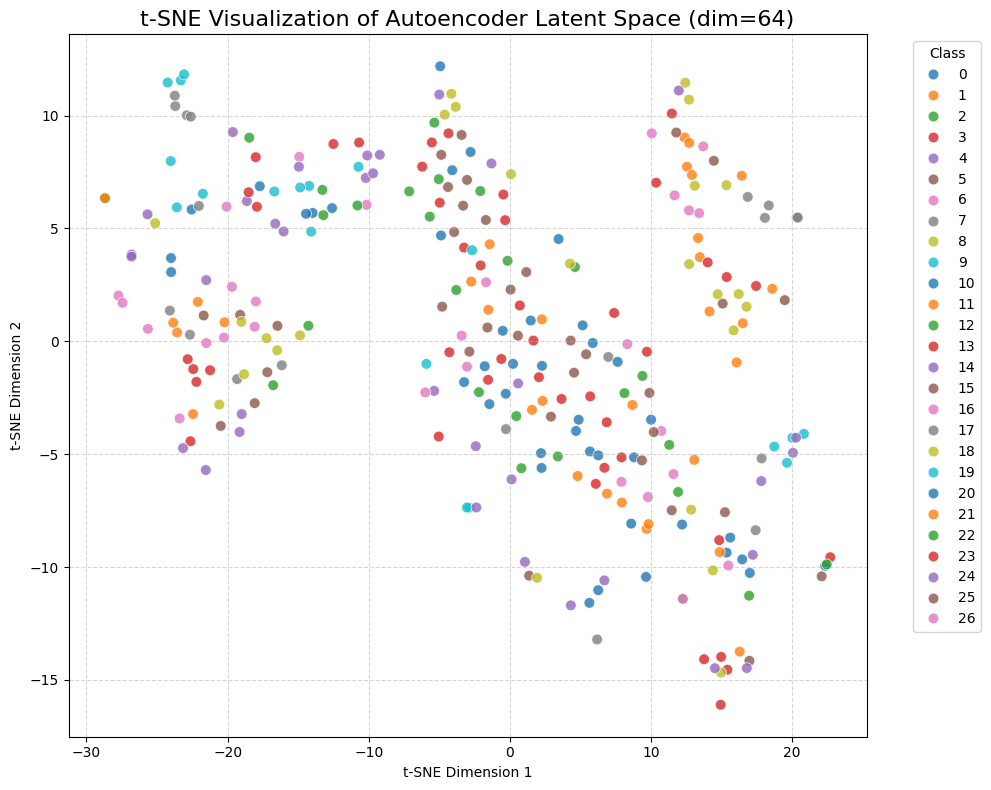

In [22]:
# 6. Visualization
# Now this works because 'ae_model' is still the Neural Network object
print("Visualizing Standard AE Latent Space...")
visualize_latent_space(ae_model, x_test_scaled, y_test, DEVICE)

print("Visualizing Denoising DAE Latent Space...")
visualize_latent_space(dae_model, x_test_scaled, y_test, DEVICE)



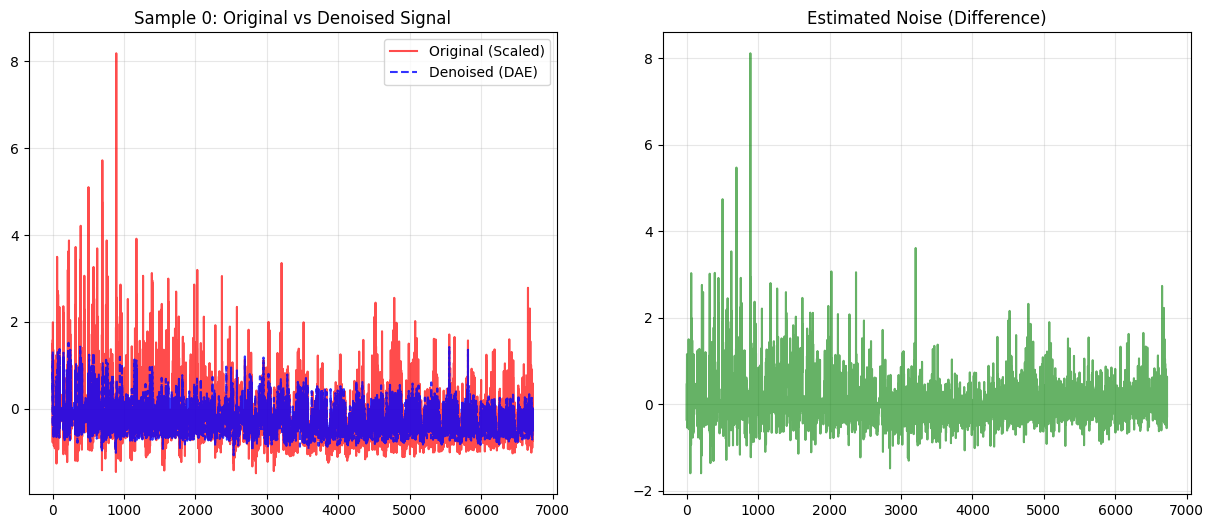

In [24]:
# 1. Get reconstructed (cleaned) data from the trained DAE model
dae_model.eval() # Set to evaluation mode
with torch.no_grad():
    # Convert test data to tensor
    x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32).to(DEVICE)
    
    # Forward pass: get reconstruction and latent features
    reconstructed_test, latent_test = dae_model(x_test_tensor)
    
    # Convert back to numpy for plotting
    reconstructed_np = reconstructed_test.cpu().numpy()

# 2. Visualize the difference for a specific sample
sample_index = 0 # Change this index to see different samples

plt.figure(figsize=(15, 6))

# Plot Original Noisy Input
plt.subplot(1, 2, 1)
plt.plot(x_test_scaled[sample_index], label='Original (Scaled)', alpha=0.7, color='red')
plt.plot(reconstructed_np[sample_index], label='Denoised (DAE)', alpha=0.8, color='blue', linestyle='--')
plt.title(f"Sample {sample_index}: Original vs Denoised Signal")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot the Noise (Residuals)
plt.subplot(1, 2, 2)
noise_removed = x_test_scaled[sample_index] - reconstructed_np[sample_index]
plt.plot(noise_removed, color='green', alpha=0.6)
plt.title("Estimated Noise (Difference)")
plt.grid(True, alpha=0.3)

plt.show()

Original Shape: (1209, 6725)
Reduced (Latent) Shape: (1209, 64)

--- Classifier Performance on Denoised Latent Features ---
              precision    recall  f1-score   support

           0       0.27      0.20      0.23        20
           1       0.47      0.42      0.44        19
           2       0.00      0.00      0.00        13
           3       0.14      0.29      0.19        31
           4       0.73      0.50      0.59        16
           5       0.00      0.00      0.00        13
           6       0.25      0.22      0.24         9
           7       0.75      0.60      0.67        15
           8       0.36      0.36      0.36        14
           9       0.64      0.82      0.72        11
          10       0.27      0.44      0.33         9
          11       0.20      0.20      0.20         5
          12       0.20      0.33      0.25         3
          13       0.00      0.00      0.00         9
          14       0.17      0.33      0.22         3
          1

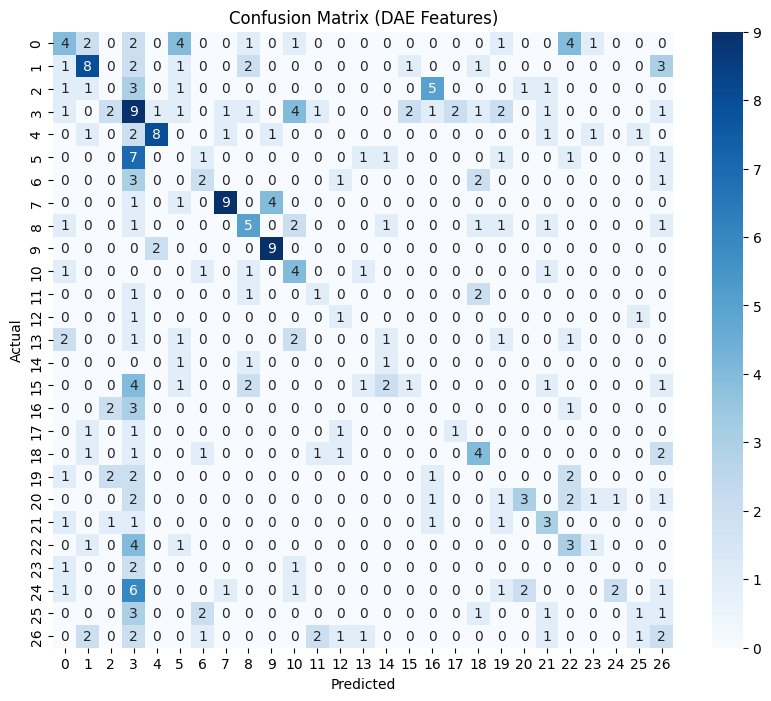

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Extract Latent Features (Dimension Reduction)
def get_latent_features(model, data):
    model.eval()
    with torch.no_grad():
        tensor_data = torch.tensor(data, dtype=torch.float32).to(DEVICE)
        _, latent = model(tensor_data)
    return latent.cpu().numpy()

# Get reduced features (64 dims) instead of original (6725 dims)
X_train_latent = get_latent_features(dae_model, x_train_scaled)
X_test_latent = get_latent_features(dae_model, x_test_scaled)

print(f"Original Shape: {x_train_scaled.shape}")
print(f"Reduced (Latent) Shape: {X_train_latent.shape}")

# 2. Train a Classifier (Random Forest) on Denoised Features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_latent, y_train)

# 3. Predict and Evaluate
y_pred = clf.predict(X_test_latent)

print("\n--- Classifier Performance on Denoised Latent Features ---")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (DAE Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()